In [23]:
# code, run by pressing "run" button to the left of this comment

# import necessary packages
from plotnine import *
import pandas as pd
import warnings
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # simple TT split cv
import numpy as np
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

# make sure you have these to make dendrograms!-------
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
#-----------------------------------------------------

warnings.filterwarnings('ignore')
%precision %.7g
%matplotlib inline

In [24]:
# code, run by pressing "run" button to the left of this comment

# import data and check for missing rows
data = pd.read_csv("https://raw.githubusercontent.com/MNGSunday/PublicData_for_CPSC354/main/LanguageRepositories_Nov2022.csv", encoding='windows-1254')
print("Missing data per column: ")
print(data.isna().sum())
print("Original data frame size: ", len(data), " rows")

Missing data per column: 
Repository Language             0
Active Repositories             0
Total Pushes                    0
Pushes Per Repository           0
New Forks Per Repository        0
Opened Issues Per Repository    0
New Watchers Per Repository     0
Appeared In Year                0
dtype: int64
Original data frame size:  30  rows


# **Q1.**
(Linear Regression) When predicting when the year a particular Programming Language was released, which predictors (Active Repositories, Total Pushes, Total Pushes, Pushes Per Repository, New Forks Per Repository, Opened Issues Per Repository, and New Watchers Per Repository) improves the accuracy of the model’s prediction when excluded from the model? What does this suggest about the nature of the Programming Languages used in GitHub repositories?

In [25]:
# code, run by pressing "run" button to the left of this comment

# Preview of the first five lines of the dataset
data.head()

,Repository Language,Active Repositories,Total Pushes,Pushes Per Repository,New Forks Per Repository,Opened Issues Per Repository,New Watchers Per Repository,Appeared In Year
0,JavaScript,323938,3461415,10.69,3.87,6.10,9.66,1995
1,Java,222852,2323315,10.43,3.48,6.67,6.24,1995
2,Python,164852,1654226,10.03,2.87,6.32,5.72,1991
3,CSS,164585,1810013,11.00,4.91,5.24,9.33,1996
4,PHP,138771,1391467,10.03,2.78,5.87,4.76,1995


In [26]:
# code, run by pressing "run" button to the left of this comment

# Linear Regression model containing all of the predictor variables
predictors_all = ["Active Repositories", "Total Pushes", "Pushes Per Repository",
                  "New Forks Per Repository", "Opened Issues Per Repository", 
                  "New Watchers Per Repository"]

outcome = data[["Appeared In Year"]]

# Randomly split the data to use 80% of the data for training and 20% for testing for model validation
x_train, x_test, y_train, y_test = train_test_split(data[predictors_all], outcome,
                                                    test_size= 0.2,
                                                    random_state = 40)

# Z-score predictor variables for both training and testing data
z = StandardScaler()
x_train[predictors_all] = z.fit_transform(x_train[predictors_all])
x_test[predictors_all] = z.transform(x_test[predictors_all])

# Linear Regression Model for model containing all predictor variables
lr_all = LinearRegression()
lr_all.fit(x_train[predictors_all], y_train)

# Print out Mean Squared Error and R2-Score for Testing and Training data
print("For the Linear Regression Model containing all variables...")
print("Training data R2 Score:", r2_score(y_train, lr_all.predict(x_train[predictors_all])))
print("Training data Mean Squared Error Score:", mean_squared_error(y_train, lr_all.predict(x_train[predictors_all])))

print("\n")

print("Testing data R2 Score:", r2_score(y_test, lr_all.predict(x_test[predictors_all])))
print("Testing data Mean Squared Error Score: ", mean_squared_error(y_test, lr_all.predict(x_test[predictors_all])))

For the Linear Regression Model containing all variables...
Training data R2 Score: 0.16331385155948508
Training data Mean Squared Error Score: 105.21183058627594


Testing data R2 Score: 0.4232737382895424
Testing data Mean Squared Error Score:  80.82177750914607


In [27]:
# code, run by pressing "run" button to the left of this comment

# Linear Regression model excluding Number of Active Repositories
exclude_active = ["Total Pushes", "Pushes Per Repository",
                  "New Forks Per Repository", "Opened Issues Per Repository", 
                  "New Watchers Per Repository"]

# Linear Regression Model for model exlcuding Number of Active Repositories
lr_no_active = LinearRegression()
lr_no_active.fit(x_train[exclude_active], y_train)

# Print out Mean Squared Error and R2-Score for Testing and Training data
print("For the Linear Regression Model excluding Number of Active Repositories...")
print("Training data R2 Score:", r2_score(y_train, lr_no_active.predict(x_train[exclude_active])))
print("Training data Mean Squared Error Score:", mean_squared_error(y_train, lr_no_active.predict(x_train[exclude_active])))

print("\n")

print("Testing data R2 Score:", r2_score(y_test, lr_no_active.predict(x_test[exclude_active])))
print("Testing data Mean Squared Error Score: ", mean_squared_error(y_test, lr_no_active.predict(x_test[exclude_active])))

For the Linear Regression Model excluding Number of Active Repositories...
Training data R2 Score: 0.14928609973685336
Training data Mean Squared Error Score: 106.97579602423606


Testing data R2 Score: 0.42825473624864563
Testing data Mean Squared Error Score:  80.12374598959953


In [28]:
# code, run by pressing "run" button to the left of this comment

# Linear Regression model excluding Number of Total Pushes
exclude_push_total = ["Active Repositories", "Pushes Per Repository",
                  "New Forks Per Repository", "Opened Issues Per Repository", 
                  "New Watchers Per Repository"]

# Linear Regression Model for model exlcuding Number of Total Pushes
lr_no_push_total = LinearRegression()
lr_no_push_total.fit(x_train[exclude_push_total], y_train)

# Print out Mean Squared Error and R2-Score for Testing and Training data
print("For the Linear Regression Model excluding Number of Total Pushes...")
print("Training data R2 Score:", r2_score(y_train, lr_no_push_total.predict(x_train[exclude_push_total])))
print("Training data Mean Squared Error Score:", mean_squared_error(y_train, lr_no_push_total.predict(x_train[exclude_push_total])))

print("\n")

print("Testing data R2 Score:", r2_score(y_test, lr_no_push_total.predict(x_test[exclude_push_total])))
print("Testing data Mean Squared Error Score: ", mean_squared_error(y_test, lr_no_push_total.predict(x_test[exclude_push_total])))

For the Linear Regression Model excluding Number of Total Pushes...
Training data R2 Score: 0.15172857789930394
Training data Mean Squared Error Score: 106.66865863572139


Testing data R2 Score: 0.4230374299603413
Testing data Mean Squared Error Score:  80.8548934958355


In [29]:
# code, run by pressing "run" button to the left of this comment

# Linear Regression model excluding Number of Pushes per Repository
exclude_repository_pushes = ["Active Repositories", "Total Pushes",
                  "New Forks Per Repository", "Opened Issues Per Repository", 
                  "New Watchers Per Repository"]

# Linear Regression Model for model exlcuding Number of Pushes per Repository
lr_no_repository_pushes = LinearRegression()
lr_no_repository_pushes.fit(x_train[exclude_repository_pushes], y_train)

# Print out Mean Squared Error and R2-Score for Testing and Training data
print("For the Linear Regression Model excluding Number of Pushes Per Repository...")
print("Training data R2 Score:", r2_score(y_train, lr_no_repository_pushes.predict(x_train[exclude_repository_pushes])))
print("Training data Mean Squared Error Score:", mean_squared_error(y_train, lr_no_repository_pushes.predict(x_train[exclude_repository_pushes])))

print("\n")

print("Testing data R2 Score:", r2_score(y_test, lr_no_repository_pushes.predict(x_test[exclude_repository_pushes])))
print("Testing data Mean Squared Error Score: ", mean_squared_error(y_test, lr_no_repository_pushes.predict(x_test[exclude_repository_pushes])))

For the Linear Regression Model excluding Number of Pushes Per Repository...
Training data R2 Score: 0.15398523175241896
Training data Mean Squared Error Score: 106.384888331494


Testing data R2 Score: 0.3429048737808713
Testing data Mean Squared Error Score:  92.0845808826529


In [30]:
# code, run by pressing "run" button to the left of this comment

# Linear Regression model excluding Number of Forks Per Repository
exclude_forks = ["Active Repositories", "Total Pushes", "Pushes Per Repository",
                  "Opened Issues Per Repository", "New Watchers Per Repository"]

# Linear Regression Model for model exlcuding Number of Forks Per Repository
lr_no_forks = LinearRegression()
lr_no_forks.fit(x_train[exclude_forks], y_train)

# Print out Mean Squared Error and R2-Score for Testing and Training data
print("For the Linear Regression Model excluding Number of Forks Per Repository...")
print("Training data R2 Score:", r2_score(y_train, lr_no_forks.predict(x_train[exclude_forks])))
print("Training data Mean Squared Error Score:", mean_squared_error(y_train, lr_no_forks.predict(x_train[exclude_forks])))

print("\n")

print("Testing data R2 Score:", r2_score(y_test, lr_no_forks.predict(x_test[exclude_forks])))
print("Testing data Mean Squared Error Score: ", mean_squared_error(y_test, lr_no_forks.predict(x_test[exclude_forks])))

For the Linear Regression Model excluding Number of Forks Per Repository...
Training data R2 Score: 0.1632898597934973
Training data Mean Squared Error Score: 105.21484750919653


Testing data R2 Score: 0.4237568659311758
Testing data Mean Squared Error Score:  80.75407253825607


In [31]:
# code, run by pressing "run" button to the left of this comment

# Linear Regression model excluding Number of Opened Issues Per Repository
exclude_issues = ["Active Repositories", "Total Pushes", "Pushes Per Repository",
                  "New Forks Per Repository", "New Watchers Per Repository"]

# Linear Regression Model for model exlcuding Number of Opened Issues Per Repository
lr_no_issues = LinearRegression()
lr_no_issues.fit(x_train[exclude_issues], y_train)

# Print out Mean Squared Error and R2-Score for Testing and Training data
print("For the Linear Regression Model excluding Number of Opened Issues Per Repository...")
print("Training data R2 Score:", r2_score(y_train, lr_no_issues.predict(x_train[exclude_issues])))
print("Training data Mean Squared Error Score:", mean_squared_error(y_train, lr_no_issues.predict(x_train[exclude_issues])))

print("\n")

print("Testing data R2 Score:", r2_score(y_test, lr_no_issues.predict(x_test[exclude_issues])))
print("Testing data Mean Squared Error Score: ", mean_squared_error(y_test, lr_no_issues.predict(x_test[exclude_issues])))

For the Linear Regression Model excluding Number of Opened Issues Per Repository...
Training data R2 Score: 0.16289020662991227
Training data Mean Squared Error Score: 105.26510320067506


Testing data R2 Score: 0.43602910973274733
Testing data Mean Squared Error Score:  79.03425392773026


In [32]:
# code, run by pressing "run" button to the left of this comment

# Linear Regression model excluding Number of New Watchers Per Repository
exclude_watchers = ["Active Repositories", "Total Pushes", "Pushes Per Repository",
                  "New Forks Per Repository", "Opened Issues Per Repository"]

# Linear Regression Model for model exlcuding Number of New Watchers Per Repository
lr_no_watchers = LinearRegression()
lr_no_watchers.fit(x_train[exclude_watchers], y_train)

# Print out Mean Squared Error and R2-Score for Testing and Training data
print("For the Linear Regression Model excluding Number of New Watchers Per Repository...")
print("Training data R2 Score:", r2_score(y_train, lr_no_watchers.predict(x_train[exclude_watchers])))
print("Training data Mean Squared Error Score:", mean_squared_error(y_train, lr_no_watchers.predict(x_train[exclude_watchers])))

print("\n")

print("Testing data R2 Score:", r2_score(y_test, lr_no_watchers.predict(x_test[exclude_watchers])))
print("Testing data Mean Squared Error Score: ", mean_squared_error(y_test, lr_no_watchers.predict(x_test[exclude_watchers])))

For the Linear Regression Model excluding Number of New Watchers Per Repository...
Training data R2 Score: 0.07326075328163195
Training data Mean Squared Error Score: 116.53585135253145


Testing data R2 Score: 0.15754222250650884
Testing data Mean Squared Error Score:  118.06109687374065


In [33]:
# code, run by pressing "run" to the left of this comment

# import a dataset containing the Training and Testing R2 and Mean Squared error scores
variable_exclusion_scores = pd.read_csv("https://raw.githubusercontent.com/MNGSunday/PublicData_for_CPSC354/main/LanguageRepositories_LinearRegressionScores.csv", encoding='windows-1254')
variable_exclusion_scores

,Variable Excluded,Training Data R2 Score,Training Data Mean Squared Error Score,Testing Data R2 Score,Testing Data Mean Squared Error Score
0,None,0.163314,105.211831,0.423274,80.821778
1,Active Repositories,0.149286,106.975796,0.428255,80.123746
2,Total Pushes,0.151729,106.668659,0.423037,80.854894
3,Pushes Per Repository,0.153985,106.384888,0.342905,92.084581
4,New Forks Per Repository,0.163290,105.214848,0.423757,80.754073
5,Opened Issues Per Repository,0.162890,105.265103,0.436029,79.034254
6,New Watchers Per Repository,0.073261,116.535851,0.157542,118.061097


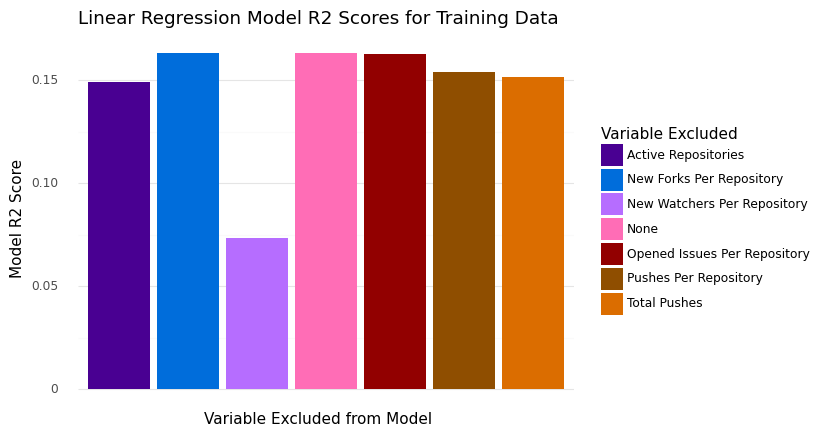

<ggplot: (8776266854590)>

In [34]:
# code, run by pressing "run" to the left of this comment

# Produce a Bar Graph Representing the Training R2 Scores 
# for each of the Linear Regression Models
(ggplot(variable_exclusion_scores, aes(x = "Variable Excluded",
                                       y = "Training Data R2 Score",
                                       fill = "Variable Excluded")) +
 geom_bar(stat = "identity") +
 ggtitle("Linear Regression Model R2 Scores for Training Data") + 
 labs(x = "Variable Excluded from Model",
      y = "Model R2 Score") +
 scale_fill_manual(["#490092", "#006ddb", "#b66dff", "#ff6db6", 
                    "#920000", "#8f4e00", "#db6d00"]) +
 theme_minimal() +
 theme(axis_text_x = element_blank(),
       axis_ticks_minor_x = element_blank(),
       axis_ticks_major_x = element_blank(),
       panel_grid_major_x = element_blank(),
       panel_grid_minor_x = element_blank()))

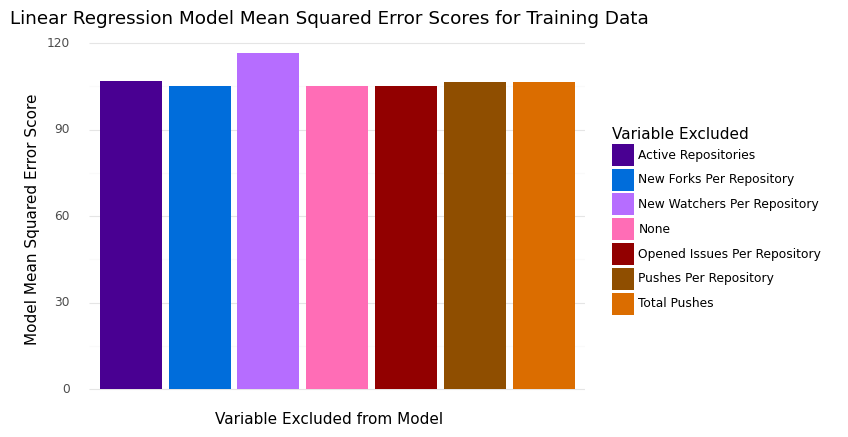

<ggplot: (8776269680210)>

In [35]:
# code, run by pressing "run" to the left of this comment

# Produce a Bar Graph Representing the Training Mean Squared Error Scores 
# for each of the Linear Regression Models
(ggplot(variable_exclusion_scores, aes(x = "Variable Excluded",
                                       y = "Training Data Mean Squared Error Score",
                                       fill = "Variable Excluded")) +
 geom_bar(stat = "identity") +
 ggtitle("Linear Regression Model Mean Squared Error Scores for Training Data") + 
 labs(x = "Variable Excluded from Model",
      y = "Model Mean Squared Error Score") +
 scale_fill_manual(["#490092", "#006ddb", "#b66dff", "#ff6db6", 
                    "#920000", "#8f4e00", "#db6d00"]) +
 theme_minimal() +
 theme(axis_text_x = element_blank(),
       axis_ticks_minor_x = element_blank(),
       axis_ticks_major_x = element_blank(),
       panel_grid_major_x = element_blank(),
       panel_grid_minor_x = element_blank()))

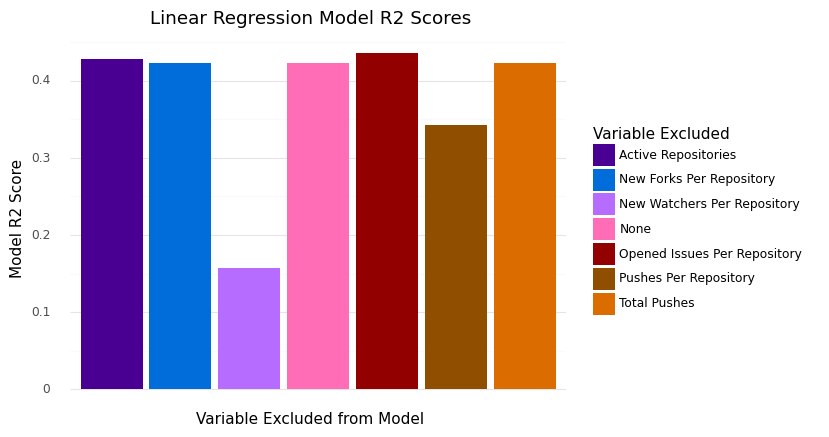

<ggplot: (8776266821301)>

In [36]:
# code, run by pressing "run" to the left of this comment

# Produce a Bar Graph Representing the Testing R2 Scores 
# for each of the Linear Regression Models
(ggplot(variable_exclusion_scores, aes(x = "Variable Excluded",
                                       y = "Testing Data R2 Score",
                                       fill = "Variable Excluded")) +
 geom_bar(stat = "identity") +
 ggtitle("Linear Regression Model R2 Scores") + 
 labs(x = "Variable Excluded from Model",
      y = "Model R2 Score") +
 scale_fill_manual(["#490092", "#006ddb", "#b66dff", "#ff6db6", 
                    "#920000", "#8f4e00", "#db6d00"]) +
 theme_minimal() +
 theme(axis_text_x = element_blank(),
       axis_ticks_minor_x = element_blank(),
       axis_ticks_major_x = element_blank(),
       panel_grid_major_x = element_blank(),
       panel_grid_minor_x = element_blank()))

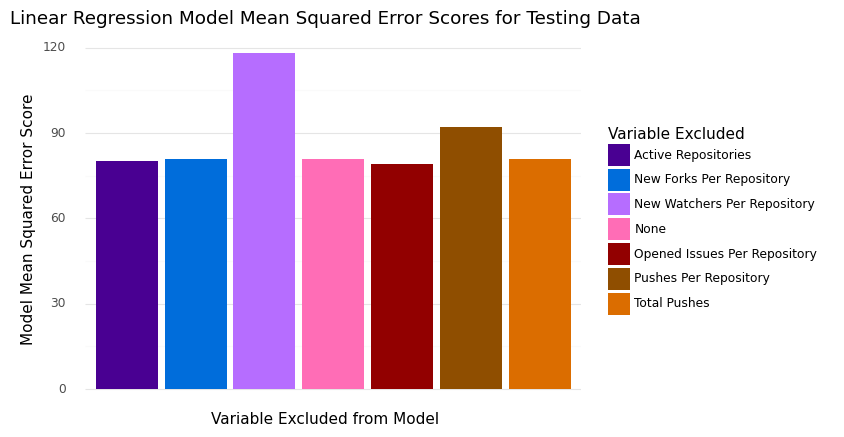

<ggplot: (8776266739264)>

In [37]:
# code, run by pressing "run" to the left of this comment

# Produce a Bar Graph Representing the Testing Mean Squared Error Scores 
# for each of the Linear Regression Models
(ggplot(variable_exclusion_scores, aes(x = "Variable Excluded",
                                       y = "Testing Data Mean Squared Error Score",
                                       fill = "Variable Excluded")) +
 geom_bar(stat = "identity") +
 ggtitle("Linear Regression Model Mean Squared Error Scores for Testing Data") + 
 labs(x = "Variable Excluded from Model",
      y = "Model Mean Squared Error Score") +
 scale_fill_manual(["#490092", "#006ddb", "#b66dff", "#ff6db6", 
                    "#920000", "#8f4e00", "#db6d00"]) +
 theme_minimal() +
 theme(axis_text_x = element_blank(),
       axis_ticks_minor_x = element_blank(),
       axis_ticks_major_x = element_blank(),
       panel_grid_major_x = element_blank(),
       panel_grid_minor_x = element_blank()))

# **Q1)**
## Question 1: 
(Linear Regression) When predicting when the year a particular Programming Language was released, which predictors (Active Repositories, Total Pushes, Total Pushes, Pushes Per Repository, New Forks Per Repository, Opened Issues Per Repository, and New Watchers Per Repository) improves the accuracy of the model’s prediction when excluded from the model? What does this suggest about the nature of the Programming Languages used in GitHub repositories?

## Response:
> An R2-Score represents how well a model can represent the variance in data that the model is used on. For instance, an R2-Score of 0.07 would imply that the model is only able to represent about 7% of the variance within the data used against the model.

> The Mean Squared Error (MSE) Score represents the average squared difference between the model's predicted values and the actual values from the data that the model is used on. In this scenario, the models all attempt to predict the **Appeared In Year** variable.

&emsp;In terms of the subset of the original data used to train the Linear Regression models, excluding any of the variables from the Linear Regression did not result in an improvement in representing the training dataset. This can be shown through the Linear Regression model including all of the predictor variables having an R2-Score of *0.1633*, whereas the other Linear Regression models excluding different variables have R2-Scores either close to the original Linear Regression's R2-Score, or evidently less than the original's score. The models with scores close to the original Linear Regression's score include the Linear Regression models that exclude the **New Forks Per Repository** and **Opened Issues Per Repository** variables with scores of *0.1632* and *0.1628* respectively. This would imply that in terms of the Training Data, these variables contributed the least in terms of fitting the training data to the original Linear Regression. Conversely, the model with an R2-Score significantly worse than the original Linear Regression was the model that excluded **New Watchers Per Repository**, with a score of *0.073*, which implies that this variable had likely contributed the most to fitting the data to the original Linear Regression. <br>
&emsp;A similar result can be seen within the Mean Squared Error Scores for each of the models. While the original Linear Regression model had a MSE Score of *105.212*, the other MSE Scores for the other models were greater than the original model's MSE Score. The models with MSE Scores similar to the original models excluded the **New Forks Per Repository** and **Opened Issues Per Repository** variables with MSE Scores of *105.215* and *105.265* respectively. The miniscule increase in the MSE Score implies that these variables did not contribute much to the model's performance, at least in terms of when the model is used against the data that it was originally trained with. Meanwhile, the the model with a MSE Score much greater than the original model's score excluded the **New Watchers Per Repository** variable, with a MSE Score of *116.536*, meaning that excluding this variable from the original model performed in an overall worse performance. <br> <br>

> Here, references to "testing data" refers to the subset of data used from the original dataset that was not used to train the Linear Regression models. In other words, the testing data contains the data points that the Linear Regression models have not seen before.

> The concept of "overfitting" means that a model is only good at predicting the data that it was originally trained with, and typically tends to perform worse when attempting to predict information from data that it has not encountered before.

&emsp;In terms of the testing data, each of the Linear Regression models had R2-Scores greater than the R2-Scores from the training data, implying that the models are not overfit. In addition to this, in comarison to the training data, when the testing data was used on the Linear Regression models, some of the models had better R2-Scores than the Linear Regression model excluding none of the variables (original), which had an R2-Score of *0.4232*. These models consisted of the models that excluded the **Active Repositories**, **New Forks Per Repository**, and **Opened Issues Per Repository** variables. The model that performed the best overall was the model that excluded the **Opened Issues Per Repository** variable, with a R2-Score of *0.4360*, implying that this variable was not nearly as helpful when predicting data that the model was not trained with. Similarly to the results of the training data, the model that had the worst R2-Score excluded the **New Watchers Per Repository** variable, with a R2-Score of *0.1575*, meaning that this variable contributes greatly to the model's overall performance when used against new data. <br>
&emsp;A similar trend is also found within the Mean Squared Error Scores when the testing data is used on the Linear Regression models. The original model had a MSE Score of *80.8218*, which was better than the MSE Score of the training data used on original model. Similar to the R2-Score of the testing data, the model performing better on the testing data compared to the training data implies that the models are not overfit. Also similar to the R2-Score results, the models with MSE Scores better than the original models excluded the **Active Repositories**, **New Forks Per Repository**, and **Opened Issues Per Repository** variables. The model that performed the best overall was the model that excluded the **Opened Issues Per Repository** variable, with a MSE Score of *79.0433*, implying that this variable had contributed the most in terms of causing incorrect predictions. Conversely, the model that had the worst MSE Score when the testing data was used was the model that excluded the **New Watchers Per Repository** variable, with a MSE Score of *118.0611.* This would imply that excluding this variable from the model would not be a good idea as it contributes the most in terms of the model correctly predicting **Appeared In Year**. <br> <br>
&emsp;Overall, based on the R2 and Mean Squared Error Scores from the testing data being used on the Linear Regression models, the variable that improved the Linear Regression model's performance and accuracy when predicting the year in which a programming language was released was the *Opened Issues Per Repository* variable. Conversely, the variable that resulted in the worst accuraccy and performance when excluded from the model was the *New Watchers Per Repository* variable. Within the context of the original dataset being satistics of programming languages found in GitHub, the average number of open issues for a particular programming language on GitHub is not very indicative of the year in which that programming language was originally released. In other words, whether a particular programming language has many or few currently open issues on GitHub does not reveal much about that programming language's characteristics. Conversely, as excluding the *New Watchers Per Repository* variable worsened the performance of the model, the number of new watchers that a programming language on GitHub receieves is significant in predicting the year in which that programming language was originally released.

# **Q2.**
(Clustering) When considering the number of Opened Issues Per Repository and the number of New Watchers Per Repository, what clusters emerge? What can be said about those clusters? What percentage of those clusters contain Programming Languages that were released prior to 1993?

In [38]:
# code, run by pressing "run" button to the left of this comment

# Copy of the Programming Languages Dataset specifically for this clustering section

cluster_data = pd.read_csv("https://raw.githubusercontent.com/MNGSunday/PublicData_for_CPSC354/main/LanguageRepositories_Nov2022.csv", encoding='windows-1254')

In [39]:
# code, run by pressing "run" button to the left of this comment

# Establish and Z-Score variables for copy of the dataset for the clustering section
important_variables = ["Repository Language", "Opened Issues Per Repository",
                       "New Watchers Per Repository", "Appeared In Year"]
cluster_variables = ["Opened Issues Per Repository", "New Watchers Per Repository"]

zCluster = cluster_data[important_variables]

# Z-Score the variables used for the Clustering Model
cluster_z = StandardScaler()
cluster_z.fit(zCluster[cluster_variables])
zCluster[cluster_variables] = cluster_z.transform(zCluster[cluster_variables])

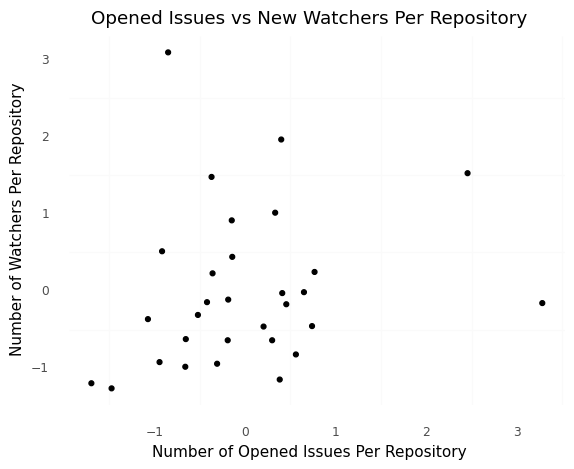

<ggplot: (8776266845392)>

In [40]:
# code, run by pressing "run" button to the left of this comment

# General Scatterplot Diagram for Opened Issues Per Repository vs
# New Watchers Per Repository without Clustering
(ggplot(zCluster, aes(x = "Opened Issues Per Repository",
                     y = "New Watchers Per Repository")) + geom_point() +
  theme_minimal() + theme(panel_grid_major = element_blank()) +
 labs(x = "Number of Opened Issues Per Repository", y = "Number of Watchers Per Repository",
      title = "Opened Issues vs New Watchers Per Repository")) 

> In this section, the assumptions of different clustering algorithms is discussed and is used to assess which clustering algorithms would work the best and the worst with the above scatterplots.

&nbsp;&nbsp;&nbsp;&nbsp;The **KMeans** algorithm is a rather simple clustering method that attempts to find K centroids in the data, where K is a number either decided by the user or randomly generated. In turn, the algorithm attempts to run until the points assigned to each cluster do not change or the location of the centroid in each cluster does not significantly change. **KMeans** also assumes that the variance of each predictor in each cluster is consistent, which would mean that the **KMeans** algorithm would be most effective on spherical-shaped clusters of data, which does not appear to be very present in the above scatterplots. Because of this, **KMeans** would likely not be a good choice of clustering algorithm for this data.
\
\
&nbsp;&nbsp;&nbsp;&nbsp;The **Gaussian Mixture Models (EM)** model, while similar to the **KMeans** model, assumes that there are multiple normal distributions within the data, where such distributions are used to determine the clusters in the data. Unlike **KMeans**, **EM** assumes that the variance of each predictor in the cluster is different, meaning that the **EM** model would be most effective for elliptical or spherical shaped clusters of data. While this can be effective for the above scatterplots, **EM** is suseptible to including "noise" data points in its clusters, which can potentially throw off the calculation of each cluster in the data. While a better option than **KMeans**, **EM** might not be a good choice of clustering model for the data.
\
\
&nbsp;&nbsp;&nbsp;&nbsp;The **DBSCAN** clustering algorithm does not make any assumptions about the potential shape of clusters within the data, which already makes it a better option than **KMeans** and **EM** due to its assumptions about the variance of each predictor within said clusters. In addition to this, **DBSCAN** also ignores "noise" points, which are essentially outlier points, which the two previous algorithms are suseptible to as they attempt to use every point of data. The major downside of **DBSCAN** are clusters that are extremely close to each other, as the points of such clusters may overlap and data sets in which the clusters have different densities. While this does appear to be present due to the large group of points towards the bottom left of the above scatterplot, **DBSCAN** appears to be best choice of clustering model for the data so far. 
\
\
&nbsp;&nbsp;&nbsp;&nbsp;The **Hierarchical Clustering** model assumes that there exists an inherent hierarchical relationship. This is accomplished through generating clusters through determining how close each data point is to each other, and determining what points to "link" together based on the distances between each point. **Hierarchical Clustering** is suseptible to overlapping clusters, which as mentioned with **DBSCAN** appears to potentially exist within the bottom left corner of the scatterplot. In addition to this, the model also attempts to use all data points when determining the clusters, which makes the model also suseptible to noise. Because of this, although also a good choice, I would not consider **Hierarchical Clustering** to be the better choice of clustering model for the data over **DBSCAN**.
\
\
&nbsp;&nbsp;&nbsp;&nbsp;With this in mind, the two potentially best options for clustering models would be the **DBSCAN** followed by the **Hierarchical Clustering** models.

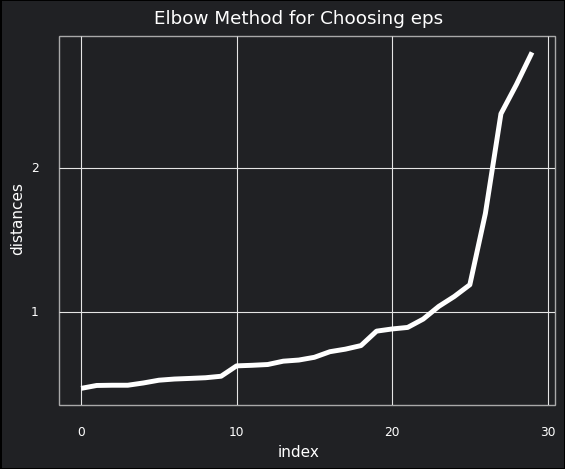

<ggplot: (8776266688389)>

In [41]:
# code, run by pressing "run" button to the left of this comment

# Determining epsilon for DBSCAN
mins = 5
nn = NearestNeighbors(n_neighbors= mins + 1)
nn.fit(zCluster[cluster_variables])

distances, neighbors = nn.kneighbors(zCluster[cluster_variables])
distances = np.sort(distances[:, mins], axis = 0)

distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt

# Notice About how Epsilon for DBSCAN is Determined:
Based on the Dendogram (shown above) dependent on a specific minimum number of neighboring points to determine a cluster, the Epsilon value used for DBSCAN Clustering is determined by the y-value of the "Elbow" of the Dendogram graph, right before the graph rapidly shoots upwards.

In [42]:
# code, run by pressing "run" button to the left of this comment

# According to the model, with 5 min neighbors, best epsilon is around 1.036
db_model = DBSCAN(eps = 1.036, min_samples = 5).fit(zCluster[cluster_variables])

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db_model.labels_)))]

zCluster["assignments"] = db_model.labels_
# only clustered data points
db_clustered = zCluster.loc[(zCluster.assignments >= 0)]

# Could not get a silhouette score for only the clustered points as DBSCAN had only
# determined that one cluster exists within the data and decided that the rest of
# the data points are considered noise.

# Overall Data (Clustering in Regards to all points Including Noise)
print("Silhouette score for DBSCAN for overall data",
      silhouette_score(zCluster[cluster_variables], zCluster["assignments"]))

Silhouette score for DBSCAN for overall data 0.5333313784438912


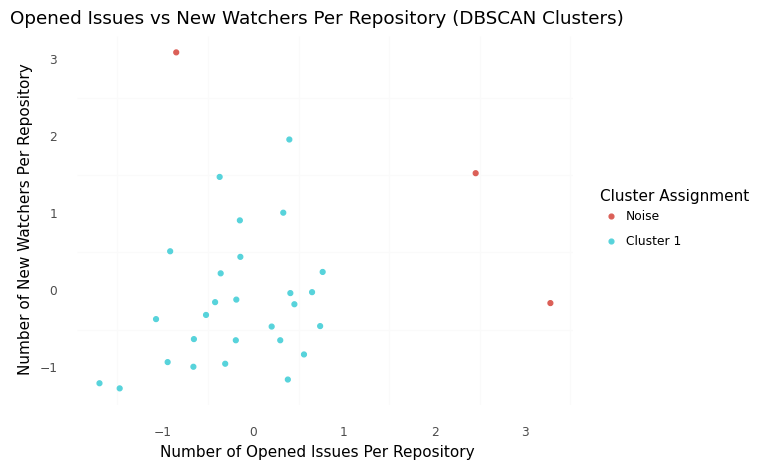

<ggplot: (8776266854289)>

In [43]:
# code, run by pressing "run" button to the left of this comment

# DBSCAN Clustering Scatterplot for Opened Issues Per Repository vs
# New Watchers Per Repository
(ggplot(zCluster, aes(x = "Opened Issues Per Repository", y = "New Watchers Per Repository",
                       color = "factor(assignments)")) + geom_point() +
 theme_minimal() + scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(x = "Number of Opened Issues Per Repository", y = "Number of New Watchers Per Repository",
     title = "Opened Issues vs New Watchers Per Repository (DBSCAN Clusters)"))

In [44]:
# code, run by pressing "run" button to the left of this comment

# Create a column to determine whether a Programming Language has been released prior to 1993
zCluster["Released Prior to 1993"] = zCluster["Appeared In Year"] <= 1993
# Determining percentage of DBSCAN Cluster 
dbscan_cluster = zCluster.loc[zCluster["assignments"] == 0]
dbscan_noise = zCluster.loc[zCluster["assignments"] == -1]

In [45]:
# code, run by pressing "run" button to the left of this comment

# Calculating percentage of Programming Languages Appearing in DBScan Cluster Prior to 1993
DB_before_1993 = dbscan_cluster.loc[dbscan_cluster["Released Prior to 1993"]]
print("Total Number of Programming Languages in DBScan Cluster: ", len(dbscan_cluster))
print("Total Number of Programming Languages in DBScan Cluster that were Released Prior to 1993: ", len(DB_before_1993))
print("Percentage of Programming Languages in DBScan Cluster Released Prior to 1993: ",
      len(DB_before_1993) / len(dbscan_cluster) * 100, "%")
print("Languages in DBScan Cluster that were Released Prior to 1993: ")
print(DB_before_1993["Repository Language"].to_string(index=False))

Total Number of Programming Languages in DBScan Cluster:  27
Total Number of Programming Languages in DBScan Cluster that were Released Prior to 1993:  13
Percentage of Programming Languages in DBScan Cluster Released Prior to 1993:  48.148148148148145 %
Languages in DBScan Cluster that were Released Prior to 1993: 
     Python
          C
      Shell
Objective-C
          R
       VimL
       Perl
        TeX
 Emacs Lisp
    Haskell
        Lua
     Matlab
   Makefile


In [46]:
# code, run by pressing "run" button to the left of this comment

# Calculating percentage of Programming Languages in DBScan Cluster Appearing After 1993
DB_after_1993 = dbscan_cluster.loc[dbscan_cluster["Released Prior to 1993"] == False]
print("Total Number of Programming Languages in DBScan Cluster: ", len(dbscan_cluster))
print("Total Number of Programming Languages in DBScan Cluster that were Released After to 1993: ", len(DB_after_1993))
print("Percentage of Programming Languages in DBScan Cluster Released After to 1993: ",
      len(DB_after_1993) / len(dbscan_cluster) * 100, "%")
print("Languages in DBScan Cluster that were Released After 1993: ")
print(DB_after_1993["Repository Language"].to_string(index=False))

Total Number of Programming Languages in DBScan Cluster:  27
Total Number of Programming Languages in DBScan Cluster that were Released After to 1993:  14
Percentage of Programming Languages in DBScan Cluster Released After to 1993:  51.85185185185185 %
Languages in DBScan Cluster that were Released After 1993: 
  JavaScript
        Java
         CSS
         PHP
        Ruby
          C#
          Go
CoffeeScript
       Scala
     Clojure
     Arduino
      Groovy
      Puppet
  PowerShell


In [47]:
# code, run by pressing "run" button to the left of this comment

# Calculating percentage of Programming Languages in Noise Cluster Appearing Prior to 1993
DB_noise_before_1993 = dbscan_noise.loc[dbscan_noise["Released Prior to 1993"]]
print("Total Number of Programming Languages in DBScan Noise Cluster: ", len(dbscan_noise))
print("Total Number of Programming Languages in DBScan Noise Cluster that were Released Prior to 1993: ",
      len(DB_noise_before_1993))
print("Percentage of Programming Languages in DBScan Noise Cluster Released Prior to 1993: ",
      len(DB_noise_before_1993) / len(dbscan_noise) * 100, "%")
print("Languages in DBScan Noise Cluster that were Released Prior to 1993: ")
print(DB_noise_before_1993["Repository Language"].to_string(index=False))

Total Number of Programming Languages in DBScan Noise Cluster:  3
Total Number of Programming Languages in DBScan Noise Cluster that were Released Prior to 1993:  1
Percentage of Programming Languages in DBScan Noise Cluster Released Prior to 1993:  33.33333333333333 %
Languages in DBScan Noise Cluster that were Released Prior to 1993: 
C++


In [48]:
# code, run by pressing "run" button to the left of this comment

# Calculating percentage of Programming Languages in Noise Cluster Appearing After 1993
DB_noise_after_1993 = dbscan_noise.loc[dbscan_noise["Released Prior to 1993"] == False]
print("Total Number of Programming Languages in DBScan Noise Cluster: ", len(dbscan_noise))
print("Total Number of Programming Languages in DBScan Noise Cluster that were Released Prior to 1993: ",
      len(DB_noise_after_1993))
print("Percentage of Programming Languages in DBScan Noise Cluster Released Prior to 1993: ",
      len(DB_noise_after_1993) / len(dbscan_noise) * 100, "%")
print("Languages in DBScan Noise Cluster that were Released Prior to 1993: ")
print(DB_noise_after_1993["Repository Language"].to_string(index=False))

Total Number of Programming Languages in DBScan Noise Cluster:  3
Total Number of Programming Languages in DBScan Noise Cluster that were Released Prior to 1993:  2
Percentage of Programming Languages in DBScan Noise Cluster Released Prior to 1993:  66.66666666666666 %
Languages in DBScan Noise Cluster that were Released Prior to 1993: 
Swift
 Rust


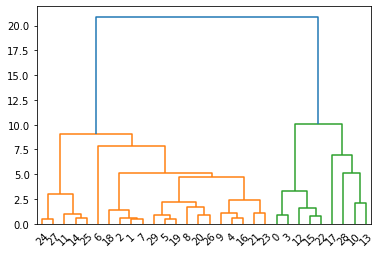

In [49]:
# code, run by pressing "run" button to the left of this comment

# Ward Linkage Dendogram for Determining Hierarchical Clustering Linkage Criteria
hac_ward = AgglomerativeClustering(affinity = "euclidean",
                             linkage = "ward")
hac_ward.fit(cluster_data[cluster_variables])
dendro_ward = sch.dendrogram(sch.linkage(cluster_data[cluster_variables],
                                    method='ward'))

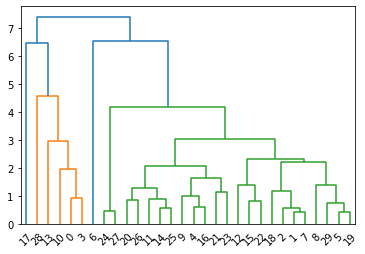

In [50]:
# code, run by pressing "run" button to the left of this comment

# Average Linkage Dendogram for Determining Hierarchical Clustering Linkage Criteria
hac_avg = AgglomerativeClustering(affinity = "euclidean",
                             linkage = "average")
hac_avg.fit(cluster_data[cluster_variables])
dendro_avg = sch.dendrogram(sch.linkage(cluster_data[cluster_variables],
                                    method='average'))

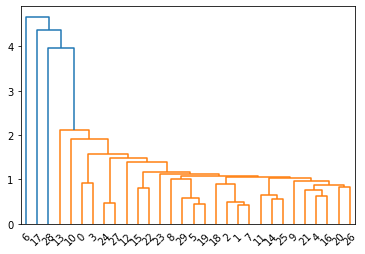

In [51]:
# code, run by pressing "run" button to the left of this comment

# Single Linkage Dendogram for Determining Hierarchical Clustering Linkage Criteria
hac_single = AgglomerativeClustering(affinity = "euclidean",
                             linkage = "single")
hac_single.fit(cluster_data[cluster_variables])
dendro_single = sch.dendrogram(sch.linkage(cluster_data[cluster_variables],
                                    method='single'))

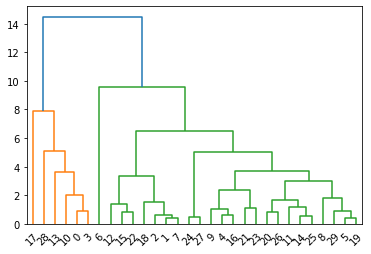

In [52]:
# code, run by pressing "run" button to the left of this comment

# Complete Linkage Dendogram for Determining Hierarchical Clustering Linkage Criteria
hac_complete = AgglomerativeClustering(affinity = "euclidean",
                             linkage = "complete")
hac_complete.fit(cluster_data[cluster_variables])
dendro_complete = sch.dendrogram(sch.linkage(cluster_data[cluster_variables],
                                    method='complete'))

# **Note About Linkage Criteria for Hierarchical Clustering Method**
The Dendograms for each of the above Linkage Criterion (Ward, Average, Single, and Complete) are used in order to determine the Linkage Criteria method to use for the Hierarchical Clustering method. The Linkage Criteria that was chosen to be used in the Hierarchical Clustering method was the "Complete" Linkage Criteria as the separated green and yellow points in its Dendogram were separated cleaner than the "Single" and "Average" Linkage Criteria. The "Ward" Linkage Criteria was not chosen as its Dendogram became more complex in terms of linkage towards 0 on the y-axis in comparison to the "Complete" Linkage Criteria Dendogram, which is more indicative of a model that overfits the data. 

In [53]:
# code, run by pressing "run" button to the left of this comment

# Performing Heirarchical Clustering using Complete Linkage as the criteria for clusters
hac = AgglomerativeClustering(n_clusters = 3,
                              affinity = "euclidean",
                             linkage = "complete")
hac.fit(zCluster[cluster_variables])
membership = hac.labels_
print("Hierarchical Clustering Silhouette Score: ",
      silhouette_score(zCluster[cluster_variables], membership))

Hierarchical Clustering Silhouette Score:  0.46871360964179304


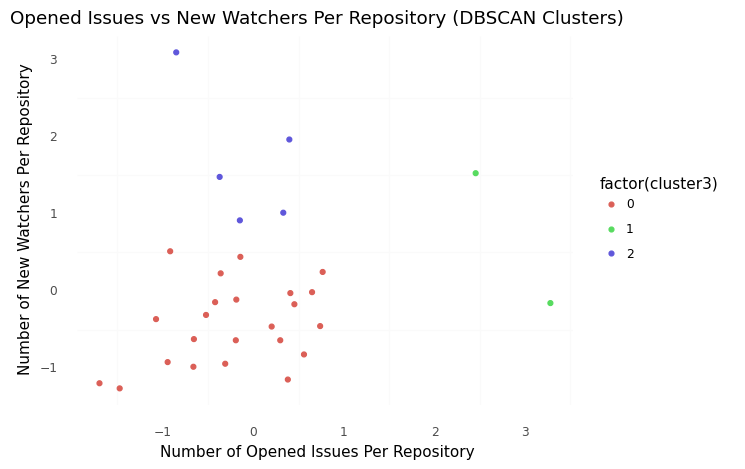

<ggplot: (8776266584426)>

In [54]:
# code, run by pressing "run" button to the left of this comment

# General Scatterplot with Heirarchal Clustering using Complete Linkage
zCluster["cluster3"] = membership
(ggplot(zCluster, aes(x = "Opened Issues Per Repository",
                     y = "New Watchers Per Repository")) +
 geom_point(aes(color = "factor(cluster3)")) + theme_minimal() +
 theme(panel_grid_major = element_blank()) +
labs(x = "Number of Opened Issues Per Repository", y = "Number of New Watchers Per Repository",
     title = "Opened Issues vs New Watchers Per Repository (DBSCAN Clusters)"))

In [55]:
# code, run by pressing "run" button to the left of this comment

# Creating sub-DataFrames for each of the clusters
cluster_zero = zCluster.loc[zCluster["cluster3"] == 0]
cluster_one = zCluster.loc[zCluster["cluster3"] == 1]
cluster_two = zCluster.loc[zCluster["cluster3"] == 2]

In [56]:
# code, run by pressing "run" button to the left of this comment

# Calculating percentage of Programming Languages Appearing in Cluster Zero Prior to 1993
C0_before_1993 = cluster_zero.loc[cluster_zero["Released Prior to 1993"]]
print("Total Number of Programming Languages in Cluster Zero: ", len(cluster_zero))
print("Total Number of Programming Languages in Cluster Zero that were Released Prior to 1993: ", len(C0_before_1993))
print("Percentage of Programming Languages in Cluster Zero Released Prior to 1993: ",
      len(C0_before_1993) / len(cluster_zero) * 100, "%")
print("Languages in Cluster Zero that were Released Prior to 1993: ")
print(C0_before_1993["Repository Language"].to_string(index=False))

Total Number of Programming Languages in Cluster Zero:  23
Total Number of Programming Languages in Cluster Zero that were Released Prior to 1993:  12
Percentage of Programming Languages in Cluster Zero Released Prior to 1993:  52.17391304347826 %
Languages in Cluster Zero that were Released Prior to 1993: 
    Python
         C
     Shell
         R
      VimL
      Perl
       TeX
Emacs Lisp
   Haskell
       Lua
    Matlab
  Makefile


In [57]:
# code, run by pressing "run" button to the left of this comment

# Calculating percentage of Programming Languages Appearing in Cluster Zero After 1993
C0_after_1993 = cluster_zero.loc[cluster_zero["Released Prior to 1993"] == False]
print("Total Number of Programming Languages in Cluster Zero: ", len(cluster_zero))
print("Total Number of Programming Languages in Cluster Zero that were Released After 1993: ", len(C0_after_1993))
print("Percentage of Programming Languages in Cluster Zero Released After 1993: ",
      len(C0_after_1993) / len(cluster_zero) * 100, "%")
print("Languages in Cluster Zero that were Released After 1993: ")
print(C0_after_1993["Repository Language"].to_string(index=False))

Total Number of Programming Languages in Cluster Zero:  23
Total Number of Programming Languages in Cluster Zero that were Released After 1993:  11
Percentage of Programming Languages in Cluster Zero Released After 1993:  47.82608695652174 %
Languages in Cluster Zero that were Released After 1993: 
        Java
         PHP
        Ruby
          C#
CoffeeScript
       Scala
     Clojure
     Arduino
      Groovy
      Puppet
  PowerShell


In [58]:
# code, run by pressing "run" button to the left of this comment

# Calculating percentage of Programming Languages Appearing in Cluster One Prior to 1993
C1_before_1993 = cluster_one.loc[cluster_one["Released Prior to 1993"]]
print("Total Number of Programming Languages in Cluster One: ", len(cluster_one))
print("Total Number of Programming Languages in Cluster One that were Released Prior to 1993: ", len(C1_before_1993))
print("Percentage of Programming Languages in Cluster One Released Prior to 1993: ",
      len(C1_before_1993) / len(cluster_one) * 100, "%")
print("Languages in Cluster One that were Released Prior to 1993: ")
print(C1_before_1993["Repository Language"].to_string(index=False))

Total Number of Programming Languages in Cluster One:  2
Total Number of Programming Languages in Cluster One that were Released Prior to 1993:  1
Percentage of Programming Languages in Cluster One Released Prior to 1993:  50.0 %
Languages in Cluster One that were Released Prior to 1993: 
C++


In [59]:
# code, run by pressing "run" button to the left of this comment

# Calculating percentage of Programming Languages Appearing in Cluster One After 1993
C1_after_1993 = cluster_one.loc[cluster_one["Released Prior to 1993"] == False]
print("Total Number of Programming Languages in Cluster One: ", len(cluster_one))
print("Total Number of Programming Languages in Cluster One that were Released After 1993: ", len(C1_after_1993))
print("Percentage of Programming Languages in Cluster One Released After 1993: ",
      len(C1_after_1993) / len(cluster_one) * 100, "%")
print("Languages in Cluster One that were Released After 1993: ")
print(C1_after_1993["Repository Language"].to_string(index=False))

Total Number of Programming Languages in Cluster One:  2
Total Number of Programming Languages in Cluster One that were Released After 1993:  1
Percentage of Programming Languages in Cluster One Released After 1993:  50.0 %
Languages in Cluster One that were Released After 1993: 
Rust


In [60]:
# code, run by pressing "run" button to the left of this comment

# Calculating percentage of Programming Languages Appearing in Cluster Two Prior to 1993
C2_before_1993 = cluster_two.loc[cluster_two["Released Prior to 1993"]]
print("Total Number of Programming Languages in Cluster Two: ", len(cluster_two))
print("Total Number of Programming Languages in Cluster Two that were Released Prior to 1993: ", len(C2_before_1993))
print("Percentage of Programming Languages in Cluster Two Released Prior to 1993: ",
      len(C2_before_1993) / len(cluster_two) * 100, "%")
print("Languages in Cluster Two that were Released Prior to 1993: ")
print(C2_before_1993["Repository Language"].to_string(index=False))

Total Number of Programming Languages in Cluster Two:  5
Total Number of Programming Languages in Cluster Two that were Released Prior to 1993:  1
Percentage of Programming Languages in Cluster Two Released Prior to 1993:  20.0 %
Languages in Cluster Two that were Released Prior to 1993: 
Objective-C


In [61]:
# code, run by pressing "run" button to the left of this comment

# Calculating percentage of Programming Languages Appearing in Cluster Two After 1993
C2_after_1993 = cluster_two.loc[cluster_two["Released Prior to 1993"] == False]
print("Total Number of Programming Languages in Cluster Two: ", len(cluster_two))
print("Total Number of Programming Languages in Cluster Two that were Released After 1993: ", len(C2_after_1993))
print("Percentage of Programming Languages in Cluster Two Released After 1993: ",
      len(C2_after_1993) / len(cluster_two) * 100, "%")
print("Languages in Cluster Two that were Released After 1993: ")
print(C2_after_1993["Repository Language"].to_string(index=False))

Total Number of Programming Languages in Cluster Two:  5
Total Number of Programming Languages in Cluster Two that were Released After 1993:  4
Percentage of Programming Languages in Cluster Two Released After 1993:  80.0 %
Languages in Cluster Two that were Released After 1993: 
JavaScript
       CSS
        Go
     Swift


# **Q2)**
## Question 2: (Clustering) When considering the number of Opened Issues Per Repository and the number of New Watchers Per Repository, what clusters emerge? What can be said about those clusters? What percentage of those clusters contain Programming Languages that were released prior to 1993?
&emsp;In terms of the clustering model created by DBSCAN, only one cluster exists, while the rest of the data points not included within the one cluster are considered "noise" points as they do not fit under any other cluster. The single cluster made by the DBSCAN model appears to be characterized by Programming Languages that fall within 1 Standard Deviation from both the average number of New Watchers Per Repository and the number of Opened Issues Per Repository. The Programming Languages that were considered "noise" by the DBSCAN meanwhile fell over 3 Standard Deviations past either the average number of New Watchers Per Repository or past the average number of Opened Issues Per Repository. Through this, it can be said that the DBSCAN Cluster simply consists of the Programming Languages that share similar New Watchers Per Repository and Opened Issues Per Repository values, whereas the noise cluster consisted of any Programming Languages that fell within outlier values. As for the percentage of the DBSCAN cluster that was released prior to 1993, *48.148%* of the 27 Programming Languages within the cluster were released prior to 1993, while 33.333% of the 3 Programming Languages assigned to the "noise" cluster were released prior to 1993. <br>
&emsp;In terms of the clustering model created by the Hierarchical Clustering method, 3 clusters emerged. Cluster 0 of the Hierarchical Clustering method consisted of Programming Languages whose number of Opened Issues Per Repository and number of New Watchers Per Repository were below +1 Standard Deviation from the average. Cluster 1 consisted of Programming Languages whose number of Opened Issues Per Repository were over +2 Standard Deviations from the average. Meanwhile, Cluster 1 consisted of Programming Languages whose number of New Watchers Per Repository were about at least +1 Standard Deviation from the average. Through this, it can be said that Cluster 0 consisted of Programming Languages that shared around average values, while Cluster 1 consisted of Programming Languages with a lot of Open Issues Per Repository and Cluster 2 contained Programming Languages with a lot of New Watchers Per Repository. As for the percentages for each cluster--52.174% of Cluster 0's 23 Programming Languages, 50% of Cluster 1's 2 Programming Languages, and 20% of Cluster 2's 5 Programming Languages were released prior to 1993.


# **Q3.**
(Feature Reduction) Apply LASSO to the Linear Regression model created in Question 1 and based on the variables that LASSO determines to have a coefficient, create another Linear Regression model. How did this effect the original model? What does this tell you about the GitHut data regarding Programming Languages used in GitHub repositories?

In [62]:
# code, run by pressing "run" button to the left of this comment

# Manual Method of Applying LASSO, which involves choosing the variables to exclude
# based on the LASSO coefficients of each of the variables used in the original
# Linear Regression model

# Determining alpha value to use for LASSO
lsr_alpha = LassoCV(cv = 5).fit(x_train[predictors_all],
                                y_train["Appeared In Year"])
print("The alpha to use for LASSO is: ", lsr_alpha.alpha_)

The alpha to use for LASSO is:  3.456872390218585


# Warning Notice Note

The *Convergence Warning* notification from the manual alpha-selection for LASSO is a likely result from having too little of a dataset to work with.

In [63]:
# code, run by pressing "run" button to the left of this comment

logistic_co = lr_all.coef_[0]

# Create Lasso Model and get its Coefficients
lasso = Lasso(alpha = lsr_alpha.alpha_, fit_intercept = True,
              tol=0.000001, max_iter = 100000)

lasso.fit(x_train[predictors_all], y_train["Appeared In Year"])
lasso_co = lasso.coef_
conames = ["Active", "Pushes", "Pushes/Repository",
                  "New Forks", "Issues", 
                  "New Watchers"] * 2
# Create the dataframe to use to graph the comparison between the coefficients 
# for each variable as determined by Logistic Regression and LASSO
model_coefs = np.concatenate([logistic_co,lasso_co])
model = np.repeat(np.array(["Linear", "LASSO"]), [6,6], axis=0)

compare_df = pd.DataFrame({"conames": conames, "coefs": model_coefs, "model": model})
compare_df["Odds Coefs"] = np.exp(compare_df["coefs"])
compare_df

,conames,coefs,model,Odds Coefs
0,Active,-1.638289e+01,Linear,7.673617e-08
1,Pushes,1.521883e+01,Linear,4.068699e+06
2,Pushes/Repository,-2.143425e+00,Linear,1.172526e-01
3,New Forks,7.167881e-02,Linear,1.074310e+00
4,Issues,-3.853283e-01,Linear,6.802273e-01
5,New Watchers,3.962142e+00,Linear,5.256982e+01
6,Active,-0.000000e+00,LASSO,1.000000e+00
7,Pushes,-0.000000e+00,LASSO,1.000000e+00
8,Pushes/Repository,-0.000000e+00,LASSO,1.000000e+00
9,New Forks,0.000000e+00,LASSO,1.000000e+00


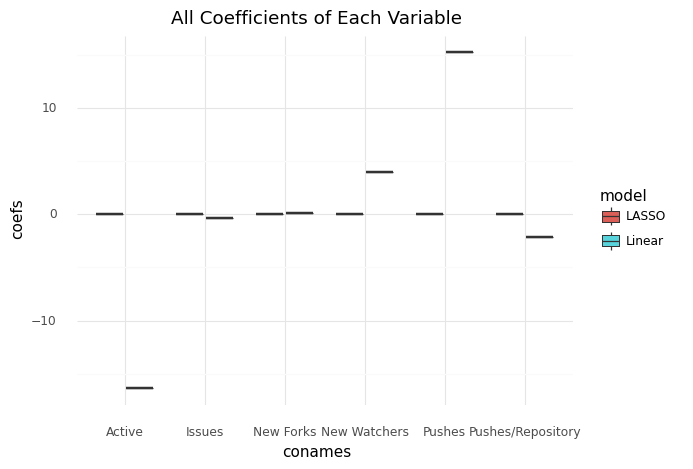

<ggplot: (8776266900821)>

In [64]:
# code, run by pressing "run" button to the left of this comment

# Boxplot comparing the coefficients of variables between Logistic and LASSO model
(ggplot(compare_df, aes(x = "conames", y = "coefs", fill = "model")) +
geom_boxplot() + ggtitle("All Coefficients of Each Variable") +
 theme(axis_text_x = element_text(angle = 75)) +
 theme_minimal())

# **Note About LASSO**
Although difficult to see within the above Variable Coefficient graph, a non-zero LASSO Coefficient indicates a variable determined to be significant enough to use as a predictor variable within a Linear Regression, and any other LASSO Coefficient that is zero or close to zero can be excluded from the Linear Regression model, hence the "feature reduction" aspect of performing LASSO manually. When LASSO is performed automatically, we are unable to determine which variables were kept or excluded from the new Linear Regression model, hence why a Manual LASSO model was made for this question. In the case of the Programming Languages model, the only variable that has a non-zero LASSO coefficient was *New Watchers Per Repository*. 

In [65]:
# code, run by pressing "run" button to the left of this comment

# Creating a new Logistic Model based on variables with non-zero LASSO Coefficients
lasso_var = ["New Watchers Per Repository"]
lr_lasso = LinearRegression()
lr_lasso.fit(x_train[lasso_var], y_train["Appeared In Year"])

lasso_trained = lr_lasso.predict(x_train[lasso_var])
lasso_predicted = lr_lasso.predict(x_test[lasso_var])

# Print out Mean Squared Error and R2-Score for Testing and Training data
print("For the Linear Regression Model with only New Watchers Per Repository...")
print("Lasso Training data R2 Score:",
      r2_score(y_train, lasso_trained))
print("Lasso Training data Mean Squared Error Score:",
      mean_squared_error(y_train, lasso_trained))

print("\n")

print("Lasso Testing data R2 Score:",
      r2_score(y_test, lasso_predicted))
print("Lasso Testing data Mean Squared Error Score: ",
      mean_squared_error(y_test, lasso_predicted))

For the Linear Regression Model with only New Watchers Per Repository...
Lasso Training data R2 Score: 0.09503086844057518
Lasso Training data Mean Squared Error Score: 113.79829716663316


Lasso Testing data R2 Score: 0.3530214194316901
Lasso Testing data Mean Squared Error Score:  90.66685941575344


In [66]:
# code, run by pressing "run" button to the left of this comment

# Using the automatic application of LASSO, in which we do not know which
# variables have been used or excluded from the new Linear Regression Model

lsr_tune = LassoCV(cv = 5).fit(x_train[predictors_all],y_train["Appeared In Year"])

# Print out Mean Squared Error and R2-Score for Testing and Training data
print("For the Linear Regression Model excluding Number of Opened Issues Per Repository...")
print("Lasso Training data R2 Score:",
      r2_score(y_train, lsr_tune.predict(x_train[predictors_all])))
print("Lasso Training data Mean Squared Error Score:",
      mean_squared_error(y_train, lsr_tune.predict(x_train[predictors_all])))

print("\n")

print("Lasso Testing data R2 Score:",
      r2_score(y_test, lsr_tune.predict(x_test[predictors_all])))
print("Lasso Testing data Mean Squared Error Score: ",
      mean_squared_error(y_test, lsr_tune.predict(x_test[predictors_all])))

print("\n" + str(lsr_tune.alpha_) + " was chosen as the alpha for LASSO.")

For the Linear Regression Model excluding Number of Opened Issues Per Repository...
Lasso Training data R2 Score: 0.0
Lasso Training data Mean Squared Error Score: 125.7482638888889


Lasso Testing data R2 Score: -0.011905351833497058
Lasso Testing data Mean Squared Error Score:  141.80729166666646

3.456872390218585 was chosen as the alpha for LASSO.


In [67]:
# code, run by pressing "run" to the left of this comment

# import a dataset containing the LASSO R2 and Mean Squared error scores
lasso_scores = pd.read_csv("https://raw.githubusercontent.com/MNGSunday/PublicData_for_CPSC354/main/LanguageRepositories_LassoScores.csv", encoding='windows-1254')
lasso_scores

,Type of Linear Regression Model,Training Data R2 Score,Training Data Mean Squared Error Score,Testing Data R2 Score,Testing Data Mean Squared Error Score
0,All Variables,0.163314,105.211831,0.423274,80.821778
1,Manual LASSO,0.095031,113.798297,0.353021,90.666859
2,Automatic LASSO,0.000000,125.748264,-0.011905,141.807292


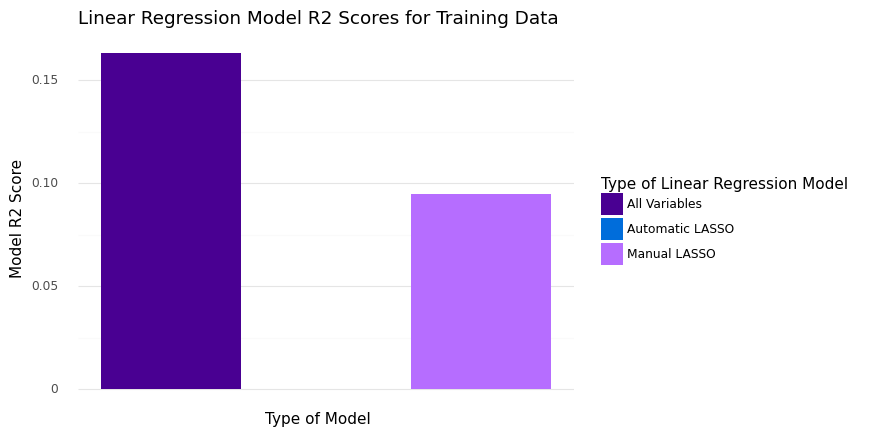

<ggplot: (8776269683396)>

In [68]:
# code, run by pressing "run" to the left of this comment

# Produce a Bar Graph Representing the Training R2 Scores 
# for each of the models (Original Linear Regression, Manual LASSO, and Automatic LASSO)
(ggplot(lasso_scores, aes(x = "Type of Linear Regression Model",
                                       y = "Training Data R2 Score",
                                       fill = "Type of Linear Regression Model")) +
 geom_bar(stat = "identity") +
 ggtitle("Linear Regression Model R2 Scores for Training Data") + 
 labs(x = "Type of Model",
      y = "Model R2 Score") +
 scale_fill_manual(["#490092", "#006ddb", "#b66dff"]) +
 theme_minimal() +
 theme(axis_text_x = element_blank(),
       axis_ticks_minor_x = element_blank(),
       axis_ticks_major_x = element_blank(),
       panel_grid_major_x = element_blank(),
       panel_grid_minor_x = element_blank()))

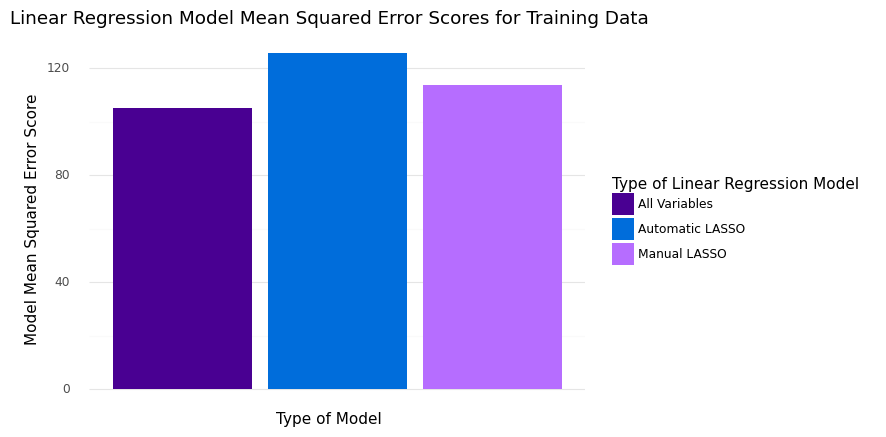

<ggplot: (8776269672771)>

In [69]:
# code, run by pressing "run" to the left of this comment

# Produce a Bar Graph Representing the Training Mean Squared Error Scores
# for each of the models (Original Linear Regression, Manual LASSO, and Automatic LASSO)
(ggplot(lasso_scores, aes(x = "Type of Linear Regression Model",
                                       y = "Training Data Mean Squared Error Score",
                                       fill = "Type of Linear Regression Model")) +
 geom_bar(stat = "identity") +
 ggtitle("Linear Regression Model Mean Squared Error Scores for Training Data") + 
 labs(x = "Type of Model",
      y = "Model Mean Squared Error Score") +
 scale_fill_manual(["#490092", "#006ddb", "#b66dff"]) +
 theme_minimal() +
 theme(axis_text_x = element_blank(),
       axis_ticks_minor_x = element_blank(),
       axis_ticks_major_x = element_blank(),
       panel_grid_major_x = element_blank(),
       panel_grid_minor_x = element_blank()))

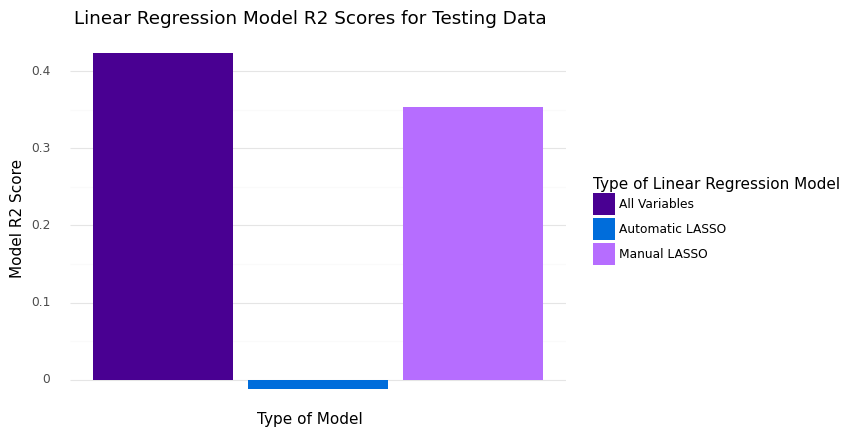

<ggplot: (8776266524591)>

In [70]:
# code, run by pressing "run" to the left of this comment

# Produce a Bar Graph Representing the Testing R2 Scores 
# for each of the models (Original Linear Regression, Manual LASSO, and Automatic LASSO)
(ggplot(lasso_scores, aes(x = "Type of Linear Regression Model",
                                       y = "Testing Data R2 Score",
                                       fill = "Type of Linear Regression Model")) +
 geom_bar(stat = "identity") +
 ggtitle("Linear Regression Model R2 Scores for Testing Data") + 
 labs(x = "Type of Model",
      y = "Model R2 Score") +
 scale_fill_manual(["#490092", "#006ddb", "#b66dff"]) +
 theme_minimal() +
 theme(axis_text_x = element_blank(),
       axis_ticks_minor_x = element_blank(),
       axis_ticks_major_x = element_blank(),
       panel_grid_major_x = element_blank(),
       panel_grid_minor_x = element_blank()))

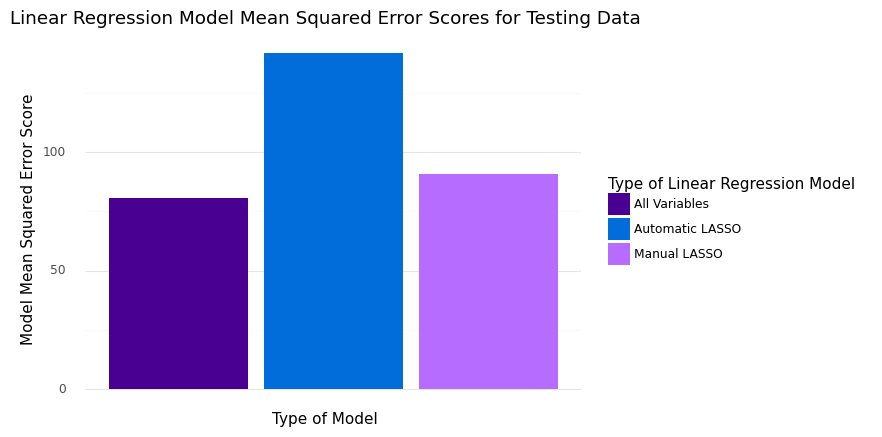

<ggplot: (8776266511749)>

In [71]:
# code, run by pressing "run" to the left of this comment

# Produce a Bar Graph Representing the Testing Mean Squared Error Scores
# for each of the models (Original Linear Regression, Manual LASSO, and Automatic LASSO)
(ggplot(lasso_scores, aes(x = "Type of Linear Regression Model",
                                       y = "Testing Data Mean Squared Error Score",
                                       fill = "Type of Linear Regression Model")) +
 geom_bar(stat = "identity") +
 ggtitle("Linear Regression Model Mean Squared Error Scores for Testing Data") + 
 labs(x = "Type of Model",
      y = "Model Mean Squared Error Score") +
 scale_fill_manual(["#490092", "#006ddb", "#b66dff"]) +
 theme_minimal() +
 theme(axis_text_x = element_blank(),
       axis_ticks_minor_x = element_blank(),
       axis_ticks_major_x = element_blank(),
       panel_grid_major_x = element_blank(),
       panel_grid_minor_x = element_blank()))

# **Q3)**
## Question 3: (Feature Reduction) Apply LASSO to the Linear Regression model created in Question 1 and based on the variables that LASSO determines to have a coefficient, create another Linear Regression model. How did this effect the original model? What does this tell you about the GitHut data regarding Programming Languages used in GitHub repositories?
&emsp;Overall, it appears that the original Linear Regression model using all of the variables performed better than the Linear Regression models created using LASSO manually and using LASSO automatically. This can be shown through the original Linear Regression model having greater R2 and Mean Squared Error Scores than the Manual and Automatic LASSO models for both the training and testing data. However, as the Linear Regression models created using LASSO manually and (assumed due to nature of LASSO) automatically do not use every variable that the original Linear Regression used, the two LASSO Linear Regression models are not nearly as overfit as the original Linear Regression model. Though not much can be said about the GitHub data from the Automatic LASSO model, the Manual LASSO Linear Regression model implies that in comparison to the other statistics within the GitHut dataset of GitHub Programming Languages, the Number of New Watchers Per Repository could potentially be used as a good indicator of other aspects of a particular Programming Language commonly used on GitHub.


In [ ]:
# code, only run for PDF export purposes. Mostly irrelevant to the actual coding
# aspect of the final project.

# The following code is specifically for creating a PDF containing the outputs of
# the notebook as a PDF, do not run for general testing

# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null

# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# installing pypandoc
!pip install pypandoc

# connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

# copying your file over.
!cp "drive/My Drive/Colab Notebooks/CPSC354_FA22_Project.ipynb" ./

# converting file to PDF, should appear under "Files" tab in the left sidebar.
!jupyter nbconvert --to PDF "CPSC354_FA22_Project.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain